In [ ]:
# Max Pooling : tf.kears.layers.MaxPool2D
# pool_size : integer or tuple (둘 중 하나를 써도 결과는 동일 2 / (2,2) : 2*2 filter)
# strides : ineger, tuple 
# padding : "valid" or "same"
# data_format : channels_last(Default) : (batch, height, width, channels) / if channels_first : (batch, channels, height, width)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
image = tf.constant([[[[4],[3]],
                      [[2],[1]]]], dtype = np.float32)

In [ ]:
image.shape

TensorShape([1, 2, 2, 1])

In [ ]:
pool = keras.layers.MaxPool2D(pool_size=2, strides = 1, padding = 'VALID')(image)

In [ ]:
print(pool.shape)
print(pool.numpy())

(1, 1, 1, 1)
[[[[4.]]]]


In [ ]:
## padding : same 
pool = keras.layers.MaxPool2D(pool_size=2, strides = 1, padding = 'SAME')(image)

# 4 3 0
# 2 1 0
# 0 0 0
# 오른쪽, 아래로 0 padding

In [ ]:
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


In [ ]:
## MNIST Data

mnist = keras.datasets.mnist
class_names = ['0','1','2','3','4','5','6','7','8','9']

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

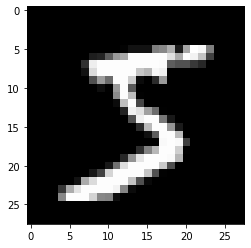

In [ ]:
img = train_images[0]
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
img = img.reshape(-1,28,28,1) # -1 :batch 자리 알아서.. 
img = tf.convert_to_tensor(img)
weight_init = keras.initializers.RandomNormal(stddev=0.01)
# 3*3 filter 5개
conv2d = keras.layers.Conv2D(filters = 5, kernel_size = 3, strides = 2, padding = 'SAME',
                             kernel_initializer = weight_init)(img)
print(conv2d.shape)

(1, 14, 14, 5)


In [ ]:
feature_maps = np.swapaxes(conv2d,0,3)


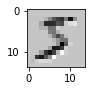

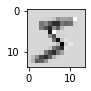

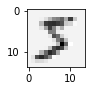

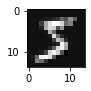

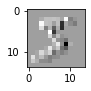

In [ ]:
for i, feature_map in enumerate(feature_maps) :
  plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(14,14), cmap='gray')
  plt.show()

In [ ]:
# Pooling Layer
pool = keras.layers.MaxPool2D(pool_size=2, strides = 2, padding = 'SAME')(conv2d)
print(pool.shape)

(1, 7, 7, 5)


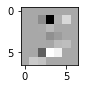

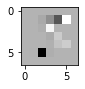

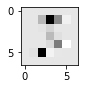

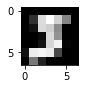

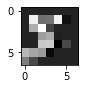

In [ ]:
feature_maps = np.swapaxes(pool,0,3)
for i, feature_map in enumerate(feature_maps) :
  plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(7,7), cmap='gray')
  plt.show()

In [ ]:
## Fully Connected(Dense) Layer 